# Project Navigation Guidelines

In [1]:
'''
===================================================
Notebook naming convention for FindMeInside (FMI)
===================================================
Notebook name: [FMI] <Coord/Label> Alg - Exp<experiment_number>, Trial<trial_number>

===================================================
Folder/File naming convention
===================================================
# Folder categorised by Experiment (except Testing folder)
Folder name: Experiment<Experiment_number>

# Each Folder has N files.
# A file is either a 1)Unprocessed Dataset, 2)Processed Dataset, 3)Results dataset, 4) Notebook file
# Each experiment has N trials. (Adjustments to parameters/algorithm are made in each trial)
Files in folder will be named accordingly...

- Raw data point:             E<experiment_number>_Label/Location<location_identifier>_<date>v<version_number>
-- e.g. E1_LabelA_230320v1
- Raw data collection:        E<experiment_number>_All_Raw_<date>v<version_number>
-- e.g. E1_All_Raw_230320v1
- Processed data (if any):    E<experiment_number>_All_Proc_<date>v<version_number>
-- e.g. E1_All_Proc_230320v1
- Resampled data (if any):    E<experiment_number>_resampled_t<trial_number>
-- e.g. E1_resampled_t1
- Results data:               E<experiment_number>_<algorithm>_t<trial_number>_k<number_of_neighbours>
-- e.g. E1_KNN_t1_k37

===================================================
List of experiment(s) & description(s)
===================================================
>> Experiment 1 (Exp1) :11 Sensors {1, ..., 11} , 4 Location Labels {A,B,C,D}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 2 (Exp2) :11 Sensors {1, ..., 11} , 4 Location Coords {(x_A, y_A), ... (x_D, y_D)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 3 (Exp3) : 12 Sensors {0x1, ..., 0xC} , 12 Location Label {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 4 (Exp4) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 5 (Exp5) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 6 (Exp6) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Resampled 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 7 (Exp7) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Label Coords (Label Model)

>> Experiment 8 (Exp8) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

'''
None

# Trial Description

In [8]:
exp = 4
trial = 5
'''
Trial 4
Algorithms use calcLocation mechanic
Resampling done within time period of 2s.
Distance weighting : Dudani weight
'''
None

# Core Libraries

In [9]:
import pandas as pd #from pandas import read_csv, pivot_table
import numpy as np
import math
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# [Exploratory Data Analysis]

# Prepare/Load Relevant Dataset

In [10]:
# Read csv file into dataframe.
csvfile = pd.read_csv('E4_All_Proc_230320v1.csv')
relDf = pd.DataFrame(csvfile)
# print(relDf)
relDf.columns = relDf.columns.str.strip() #strip unintended whitespaces

# print("Columns: ", relDf.columns)
relDf = relDf[['Date','Time', 'ID2', 'RSSI', 'Location']] #select relevant columns
# df = df.drop(columns=['Type', 'ID0', 'ID1', 'Sensor Data', 'Temperature', 'Humidity', 'Raw Data'])
print(relDf)

relDf['Location'].value_counts()

          Date       Time      ID2  RSSI Location
0      16/3/20   15:14:49   0x0001   192      1,1
1      16/3/20   15:14:49   0x0003   177      1,1
2      16/3/20   15:14:49   0x0004   179      1,1
3      16/3/20   15:14:50   0x0002   189      1,1
4      16/3/20   15:14:51   0x0008   177      1,1
...        ...        ...      ...   ...      ...
50620  19/3/20   15:48:23   0x0006   177    13,19
50621  19/3/20   15:48:24   0x0008   180    13,19
50622  19/3/20   15:48:24   0x0005   177    13,19
50623  19/3/20   15:48:24   0x0009   180    13,19
50624  19/3/20   15:48:24   0x0003   180    13,19

[50625 rows x 5 columns]


7,7      4609
1,7      4599
13,7     4494
7,19     4488
7,1      4453
7,13     4333
13,13    4286
1,13     4075
13,19    3904
1,19     3840
1,1      3800
13,1     3744
Name: Location, dtype: int64

# Resample/Reshape Dataset

In [11]:
# Preparation for Date/Time Differences
# ----------------------------------------

# Combine date and time to datetime
readings = relDf.copy()
readings['Datetime'] = pd.to_datetime(readings['Date'].apply(str)+' '+readings['Time']) #create new Datetime field
dateTime = readings['Datetime']
readings = readings.drop(columns=['Datetime'])
readings.insert(0, 'Datetime', dateTime)
readings = readings.drop(columns=['Date','Time'])
readings.tail()

from datetime import datetime as dt
earliestDate = readings.Datetime.dt.date.min()
print(readings.Datetime.dt.date.iloc[-1])
print(earliestDate - readings.Datetime.dt.date.iloc[-1])

# Function that expresses timestamps in seconds.
def time_to_sec(timeArray):
    timeSecArray = []
    for i in range(len(timeArray)):
        seconds = (timeArray[i].hour * 60 + timeArray[i].minute) * 60 + timeArray[i].second
        timeSecArray.append(seconds)
    return(timeSecArray)

# Function that calculates day difference between dates in seconds
def date_to_sec(dateArray):
    dateSecArray = []
    for i in range(len(dateArray)):
        dayDiff = dateArray[i] - earliestDate
        dateSecArray.append(dayDiff.total_seconds())
    print(i)
    return(dateSecArray)


readings['DateSec'] = date_to_sec(readings.Datetime.dt.date)
readings['TimeSec'] = time_to_sec(readings.Datetime.dt.time)
readings['DatetimeSec'] = readings['DateSec'] + readings['TimeSec']
readings = readings[['DatetimeSec', 'ID2', 'RSSI', 'Location']]
print(readings.head(15))

# pd.set_option('display.max_columns', 10)
# pd.set_option('display.min_rows', 50)
# pd.set_option('display.width', 500)

readings.DatetimeSec = (readings.DatetimeSec - readings.DatetimeSec.min()) // 2
time_diff_btw_rows = readings.DatetimeSec.diff().fillna(0)
print(time_diff_btw_rows)
time_diff_btw_rows -= (time_diff_btw_rows > 1) & (readings.DatetimeSec % 2 > 0)
readings.DatetimeSec -= (time_diff_btw_rows - 1).clip(lower=0).cumsum()
readings.ID2 = readings.ID2.transform(lambda hexadecimal: int(hexadecimal, 16))
resampled_readings = readings.groupby(["DatetimeSec", "Location", "ID2"]).mean().reset_index()
pivoted_readings = pd.pivot_table(resampled_readings, values="RSSI", columns=["ID2"], index=["DatetimeSec", "Location"]).fillna(0)

writeFile = True
if (writeFile == True):
    pivoted_readings.to_csv('E4_resampled_T1.csv')
    print("FILE WRITTEN")

pivoted_readings.tail()

2020-03-19
-3 days, 0:00:00
50624
    DatetimeSec      ID2  RSSI Location
0       54889.0   0x0001   192      1,1
1       54889.0   0x0003   177      1,1
2       54889.0   0x0004   179      1,1
3       54890.0   0x0002   189      1,1
4       54891.0   0x0008   177      1,1
5       54891.0   0x0005   177      1,1
6       54891.0   0x0001   193      1,1
7       54891.0   0x000B   177      1,1
8       54891.0   0x0009   177      1,1
9       54891.0   0x0003   180      1,1
10      54892.0   0x0002   182      1,1
11      54893.0   0x0008   177      1,1
12      54893.0   0x0001   191      1,1
13      54893.0   0x0003   185      1,1
14      54893.0   0x000C   177      1,1
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
50620    0.0
50621    0.0
50622    0.0
50623    0.0
50624    0.0
Name: DatetimeSec, Length: 50625, dtype: float64
FILE WRITTEN


,ID2,1,2,3,4,5,6,7,8,9,10,11,12
DatetimeSec,Location,,,,,,,,,,,,
5414.0,"13,19",0.0,0.0,179.0,0.0,0.0,180.0,178.0,179.0,192.0,183.0,187.0,197.0
5415.0,"13,19",0.0,0.0,178.0,0.0,177.0,180.0,178.0,181.0,192.0,182.0,187.0,197.0
5416.0,"13,19",0.0,0.0,180.0,0.0,0.0,180.0,178.0,179.0,180.0,183.0,187.0,197.0
5417.0,"13,19",0.0,178.0,0.0,177.0,177.0,177.0,0.0,180.0,0.0,0.0,192.0,197.0
5418.0,"13,19",0.0,177.0,180.0,0.0,177.0,177.0,177.0,180.0,180.0,0.0,193.0,197.0


In [24]:
resampledDS = pd.read_csv('E4_resampled_T1.csv')
tempSeries = resampledDS['Location']
resampledDS = resampledDS.drop(columns=['Location', 'DatetimeSec'])
resampledDS["Location"] = tempSeries
resampledDS.head()
print(resampledDS["Location"].value_counts())
print(len(resampledDS.values))
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_labels = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)


# #dataset.iloc[rowrange, columnrange]
X = ips_data.to_numpy()
y = ips_labels.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.3, random_state = 10) 
y_train = y_train.reshape(len(y_train),)

k_value_rootN = math.ceil(math.sqrt(len(X_train)))
k_value_cubeN = math.ceil(len(X_train)**(1/3))
print("k_value_rootN: ", k_value_rootN)
print("k_value_cubeN: ", k_value_cubeN)
print("X_test: ", X_test)
print("y_test: ", y_test)
# print("y_train: ", len(y_train))

13,7     451
13,13    451
13,1     451
1,1      451
7,13     451
7,1      451
1,19     451
1,13     451
7,19     451
13,19    451
7,7      451
1,7      451
Name: Location, dtype: int64
5412
k_value_rootN:  62
k_value_cubeN:  16
X_test:  [[  0. 177. 177. ...   0. 189. 185.]
 [  0. 177. 179. ... 177. 184. 177.]
 [191. 185. 182. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 195. 184. 189.]
 [177. 188. 193. ... 177. 179. 177.]
 [  0. 177. 179. ... 182. 187. 197.]]
y_test:  [['7,13']
 ['1,7']
 ['1,1']
 ...
 ['1,19']
 ['13,7']
 ['13,19']]


# Parameter Optimisation

In [47]:
# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
sse = []
list_k = list(range(1, 200))
X_std = StandardScaler().fit_transform(X)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

KeyboardInterrupt: 

In [ ]:
'''X = preprocessing.normalize(X)
y = y.reshape(len(y),)
k_range = list(range(1, 38))
# print(k_range)

classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(X_train, y_train)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)
print(grid.best_estimator_)'''
None

In [28]:

classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
y_train_pred = classifier.predict(X_train)

print("KNN Train Accuracy:", accuracy_score(y_train, y_train_pred)* 100, "%")
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print(classification_report(y_test, y_pred))

KNN Train Accuracy: 100.0 %
KNN Test Accuracy: 81.1576354679803 %
              precision    recall  f1-score   support

         1,1       0.83      0.84      0.83       141
        1,13       0.80      0.85      0.82       130
        1,19       0.83      0.88      0.86       126
         1,7       0.71      0.81      0.76       144
        13,1       0.79      0.88      0.83       132
       13,13       0.78      0.83      0.80       132
       13,19       0.83      0.78      0.80       150
        13,7       0.86      0.80      0.83       119
         7,1       0.84      0.81      0.82       134
        7,13       0.87      0.74      0.80       137
        7,19       0.80      0.77      0.79       136
         7,7       0.83      0.77      0.80       143

    accuracy                           0.81      1624
   macro avg       0.82      0.81      0.81      1624
weighted avg       0.81      0.81      0.81      1624



# KNN Algorithm - Distance Calculation

In [29]:
#Function calculates euclidean distance between two n-dimensional data instances 
def euclideanDistance(instance1, instance2):
    #handles if instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    '''
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
    uses 2-norm frobenius norm and returns euclidean distance
    '''
    return np.linalg.norm(instance1 - instance2) #euclidean distance

# KNN Algorithm - Determining Neighbours

In [30]:
#Function finds nearest neighbours; nearest -> smallest euclidean distance
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=euclideanDistance):
    """
    get_neighbors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = [] #empty distance array
    
    #calculates euclidean distance between test_instance and ALL other instances in training_set
    for index in range(len(training_set)):
        dist = euclideanDistance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors # The list neighbors contains 3-tuples with (index, dist, label)

In [31]:
# Get Neighbours
outArray = []
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_rootN, 
                              distance=euclideanDistance)
#     print(i,
#           X_test[i],
#           y_test[i],
#           neighbors)
    
    outArray.append([i,
          X_test[i],
          y_test[i],
          neighbors])

out_df = pd.DataFrame(outArray, columns=['i', 'X_test', 'y_test', 'neighbours'])
out_df.head()
# out_df.tail()

,i,X_test,y_test,neighbours
0,0,"[0.0, 177.0, 177.0, 0.0, 183.0, 0.0, 188.0, 0....","[7,13]","[([0.0, 191.0, 184.0, 0.0, 192.0, 0.0, 179.0, ..."
1,1,"[0.0, 177.0, 179.0, 190.0, 0.0, 184.0, 180.0, ...","[1,7]","[([0.0, 177.0, 177.0, 189.0, 0.0, 178.0, 194.0..."
2,2,"[191.0, 185.0, 182.0, 182.0, 0.0, 0.0, 0.0, 0....","[1,1]","[([192.0, 189.0, 177.0, 179.0, 0.0, 0.0, 0.0, ..."
3,3,"[0.0, 191.0, 190.0, 194.0, 193.0, 179.0, 177.0...","[7,7]","[([0.0, 191.0, 185.0, 188.0, 192.0, 179.0, 180..."
4,4,"[177.0, 182.0, 0.0, 183.0, 188.0, 177.0, 189.0...","[7,13]","[([177.0, 183.0, 0.0, 182.0, 188.0, 177.0, 189..."


In [32]:
from collections import Counter
#LOC: outputs for each [x,y] in label, 
#     where (x_n1, y_n1) rep x and y coord of 1st neighbour resp
#     x_out = sum(x_n1, ... x_N) / N, where total neighbours = N
def calcLocation(neighbours): 
    x_out = 0
    y_out = 0
    totalNeighbours = len(neighbours)
    for neighbour in neighbours:
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
#         print("neighbour label: ", labeltuple)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb
        y_out += y_nb
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
    return ((x_out/totalNeighbours) , (y_out/totalNeighbours))

In [33]:
print("NON-WEIGHTED POSITION KNN\n")
k_value_knn = k_value_rootN
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    print("calculalated location: ", calcLocation(neighbors))
    print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    print("----------------------------")

NON-WEIGHTED POSITION KNN

test location:  (7, 13)
calculalated location:  (11.741935483870968, 12.516129032258064)
distance error:  4.766558847493452
----------------------------
test location:  (1, 7)
calculalated location:  (7.580645161290323, 9.03225806451613)
distance error:  6.887304522061195
----------------------------
test location:  (1, 1)
calculalated location:  (2.064516129032258, 1.0)
distance error:  1.064516129032258
----------------------------
test location:  (7, 7)
calculalated location:  (5.548387096774194, 11.548387096774194)
distance error:  4.774411503307359
----------------------------
test location:  (7, 13)
calculalated location:  (6.419354838709677, 11.741935483870968)
distance error:  1.3855955867686793
----------------------------


In [36]:
k_value_knn = k_value_cubeN
writeKNN = True
fileNameKNN = 'E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(k_value_knn)+'.csv'
resultsKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocation(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    calcLocationRes = calcLocation(neighbors)
    locArray.append(calcLocationRes)
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationRes))


resultsKNN['index'] = indexArray
resultsKNN['data'] = dataArray
resultsKNN['pred_location'] = locArray
resultsKNN['label'] = labelArray 
resultsKNN['error'] = errorArray

if (writeKNN == True):
    resultsKNN.to_csv(fileNameKNN, index=False)
    print("File "+fileNameKNN+" has been written.")
resultsKNN.head(20)

File E4_KNN_T5_k16.csv has been written.


,index,data,pred_location,label,error
0,0,"[0.0, 177.0, 177.0, 0.0, 183.0, 0.0, 188.0, 0....","(11.5, 12.25)","7,13",4.562072
1,1,"[0.0, 177.0, 179.0, 190.0, 0.0, 184.0, 180.0, ...","(10.75, 4.75)","1,7",10.006248
2,2,"[191.0, 185.0, 182.0, 182.0, 0.0, 0.0, 0.0, 0....","(1.0, 1.0)","1,1",0.000000
3,3,"[0.0, 191.0, 190.0, 194.0, 193.0, 179.0, 177.0...","(1.75, 7.375)","7,7",5.263376
4,4,"[177.0, 182.0, 0.0, 183.0, 188.0, 177.0, 189.0...","(7.0, 13.0)","7,13",0.000000
5,5,"[0.0, 0.0, 0.0, 182.0, 177.0, 177.0, 189.0, 17...","(1.0, 19.0)","1,19",0.000000
6,6,"[177.0, 183.0, 0.0, 184.0, 0.0, 177.0, 189.0, ...","(6.625, 12.625)","7,13",0.530330
7,7,"[0.0, 0.0, 0.0, 178.0, 177.0, 177.0, 185.0, 17...","(1.0, 19.0)","1,19",0.000000
8,8,"[0.0, 177.0, 0.0, 182.0, 177.0, 187.0, 177.0, ...","(13.0, 13.0)","13,13",0.000000
9,9,"[0.0, 0.0, 178.0, 178.0, 181.0, 0.0, 179.0, 19...","(4.0, 15.25)","7,19",4.802343


# Weighted KNN

# Distance Weighted KNN

In [37]:
def calcLocationDistW(neighbours): 
    '''
    Dudani Weighting Function
    weight = ( (dist_knb - dist_inb) / (dist_knb - dist_1nb) ) --> if dist_knb != dist_1nb
    '''
    x_out = 0
    y_out = 0
    total_dist = 0
    debug = False
    # prep for Dudani weighting
    min_dist = neighbours[0][1]
    max_dist = neighbours[-1][1]
    if (debug == True):
        print("min neighbour dist:", min_dist)
        print("max neighbour dist:", max_dist)
    for neighbour in neighbours:
        
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
        dist_nb = neighbour[1]
        
        if (max_dist != dist_nb):
            weight = (max_dist - dist_nb) / (max_dist - min_dist)
        else:
            weight = 1
#         print("weight: ", weight)
        total_dist += weight 
    
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]

        x_out += x_nb*( weight )
        y_out += y_nb*( weight )
        
        if (debug == True):
            print("Neighbour distance: ", dist_nb)
            print("Total distance: ", total_dist)
#             print("x_nb: ", x_nb)
#             print("y_nb: ", y_nb)
#             print("x_out: ", x_out)
#             print("y_out: ", y_out)
    return ( (x_out/ total_dist) ,
             (y_out/ total_dist) )


In [38]:
k_value_dwknn = 3
testRange = 20
for i in range(3):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    print("Record #: ", i+1)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    calcLocationDistWRes = calcLocationDistW(neighbors)
    print("calculalated location: ", calcLocationDistWRes)
    print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistWRes))
    print("---------------------------------------------------------")

Record #:  1
test location:  (7, 13)
calculalated location:  (10.00393180612302, 4.019659030615097)
distance error:  9.469431356858262
---------------------------------------------------------
Record #:  2
test location:  (1, 7)
calculalated location:  (6.999999999999999, 6.999999999999999)
distance error:  5.999999999999999
---------------------------------------------------------
Record #:  3
test location:  (1, 1)
calculalated location:  (1.0, 1.0)
distance error:  0.0
---------------------------------------------------------


In [42]:
k_value_dwknn = 1
writeDWKNN = True
fileNameDWKNN = 'E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(k_value_dwknn)+'.csv'
resultsDWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocationDistW(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistW(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    calcLocationDistWRes = calcLocationDistW(neighbors)
    locArray.append(calcLocationDistWRes)
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationDistWRes))


resultsDWKNN['index'] = indexArray
resultsDWKNN['data'] = dataArray
resultsDWKNN['pred_location'] = locArray
resultsDWKNN['label'] = labelArray 
resultsDWKNN['error'] = errorArray

if (writeDWKNN == True):
    resultsDWKNN.to_csv(fileNameDWKNN, index=False)
    print("File "+fileNameDWKNN+" has been written.")
    
resultsDWKNN.head(20)

File E4_DWKNN_T5_k1.csv has been written.


,index,data,pred_location,label,error
0,0,"[0.0, 177.0, 177.0, 0.0, 183.0, 0.0, 188.0, 0....","(7.0, 7.0)","7,13",6.000000
1,1,"[0.0, 177.0, 179.0, 190.0, 0.0, 184.0, 180.0, ...","(1.0, 13.0)","1,7",6.000000
2,2,"[191.0, 185.0, 182.0, 182.0, 0.0, 0.0, 0.0, 0....","(1.0, 1.0)","1,1",0.000000
3,3,"[0.0, 191.0, 190.0, 194.0, 193.0, 179.0, 177.0...","(7.0, 7.0)","7,7",0.000000
4,4,"[177.0, 182.0, 0.0, 183.0, 188.0, 177.0, 189.0...","(7.0, 13.0)","7,13",0.000000
5,5,"[0.0, 0.0, 0.0, 182.0, 177.0, 177.0, 189.0, 17...","(1.0, 19.0)","1,19",0.000000
6,6,"[177.0, 183.0, 0.0, 184.0, 0.0, 177.0, 189.0, ...","(7.0, 19.0)","7,13",6.000000
7,7,"[0.0, 0.0, 0.0, 178.0, 177.0, 177.0, 185.0, 17...","(1.0, 19.0)","1,19",0.000000
8,8,"[0.0, 177.0, 0.0, 182.0, 177.0, 187.0, 177.0, ...","(13.0, 13.0)","13,13",0.000000
9,9,"[0.0, 0.0, 178.0, 178.0, 181.0, 0.0, 179.0, 19...","(7.0, 19.0)","7,19",0.000000


# Data Analysis via Visualisation

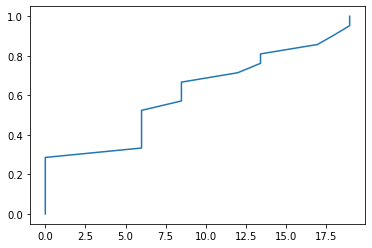

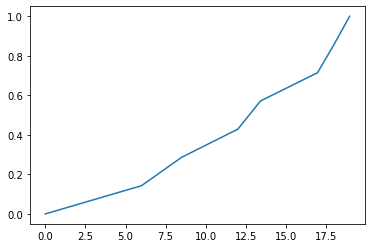

In [124]:
DataDWKNN = pd.read_csv('E4_DWKNN_T4_k1.csv')
# Find the unique values

# unique_values = np.sort(pd.Series)
# Make the rank array for these sorted and unique values in the dataset -
# ranks = np.arange(0,len(unique_values))/(len(unique_values)-1)
# Plot unique_values vs ranks

error = DataDWKNN['error']
## sort the unique values using pandas unique function
dwknn_error = np.sort(error.unique())
dwknn_cdf = np.arange(0,len(dwknn_error),step=1)/(len(dwknn_error)-1)

## plotting    
plt.plot(dwknn_error,dwknn_cdf)
plt.show()


DataDWKNN = pd.read_csv('E4_KNN_T4_k1.csv')
# Find the unique values

# unique_values = np.sort(pd.Series)
# Make the rank array for these sorted and unique values in the dataset -
# ranks = np.arange(0,len(unique_values))/(len(unique_values)-1)
# Plot unique_values vs ranks

error = DataDWKNN['error']
## sort the unique values using pandas unique function
dwknn_error = np.sort(error.unique())
dwknn_cdf = np.arange(0,len(dwknn_error),step=1)/(len(dwknn_error)-1)

## plotting    
plt.plot(dwknn_error,dwknn_cdf)
plt.show()

Plotting from...
E4_KNN_T5_k1.csv E4_KNN_T5_k16.csv E4_KNN_T5_k31.csv E4_KNN_T5_k62.csv
E4_DWKNN_T5_k1.csv E4_DWKNN_T5_k16.csv E4_DWKNN_T5_k31.csv E4_DWKNN_T5_k62.csv


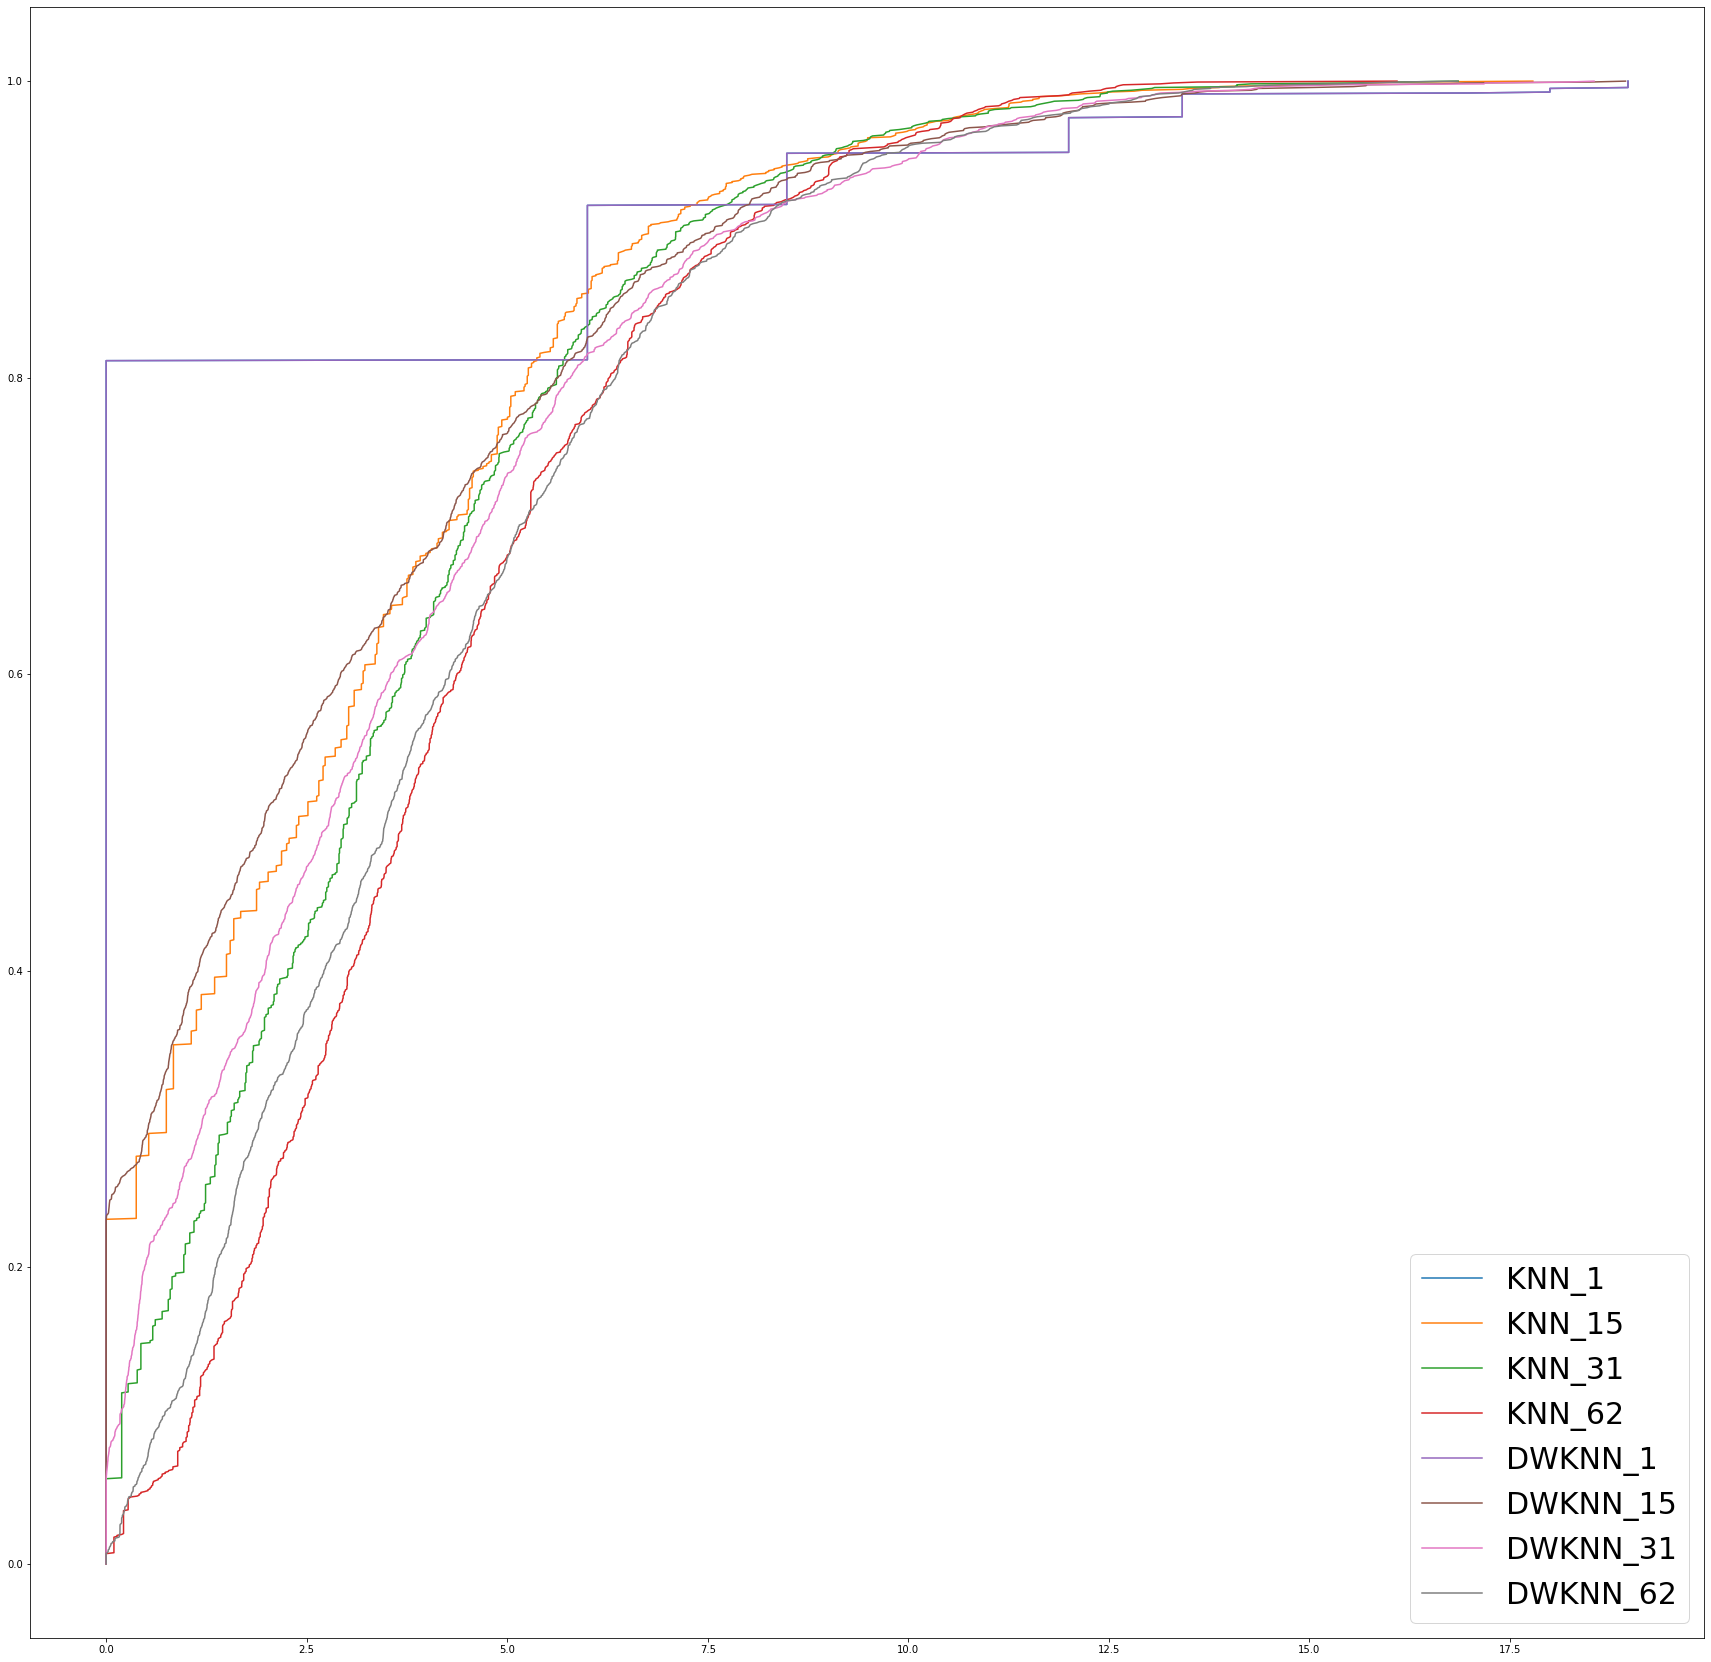

In [43]:
kvalList = [1, 16, 31, 62]
KNN_kcomp1File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[0])+'.csv')
KNN_kcomp2File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[1])+'.csv')
KNN_kcomp3File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[2])+'.csv')
KNN_kcomp4File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[3])+'.csv')

DWKNN_kcomp1File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[0])+'.csv')
DWKNN_kcomp2File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[1])+'.csv')
DWKNN_kcomp3File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[2])+'.csv')
DWKNN_kcomp4File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[3])+'.csv')
errorCDFPlot = ('E'+str(exp)+'_errorCDFPlot_T'+str(trial)+'.png')

print("Plotting from...")
print(KNN_kcomp1File, KNN_kcomp2File, KNN_kcomp3File, KNN_kcomp4File)
print(DWKNN_kcomp1File, DWKNN_kcomp2File, DWKNN_kcomp3File, DWKNN_kcomp4File)


fig= plt.figure(figsize=(30,30))


KNN_kcomp1 = pd.read_csv(KNN_kcomp1File)
errorDf = pd.DataFrame(index = range(len(KNN_kcomp1.values))) #init errorDf

error = KNN_kcomp1['error']
errorDf["knn_k"+str(kvalList[0])+"_error"] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, label = "KNN_1")

KNN_kcomp2 = pd.read_csv(KNN_kcomp2File)
error = KNN_kcomp2['error']
errorDf["knn_k"+str(kvalList[1])+"_error"] = error
knn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp2_error),step=1)/(len(knn_kcomp2_error)-1)
## plotting    
plt.plot(knn_kcomp2_error,cdf, label = "KNN_15")

KNN_kcomp3 = pd.read_csv(KNN_kcomp3File)
error = KNN_kcomp3['error']
errorDf["knn_k"+str(kvalList[2])+"_error"] = error
knn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp3_error),step=1)/(len(knn_kcomp3_error)-1)
## plotting    
plt.plot(knn_kcomp3_error,cdf, label = "KNN_31")

KNN_kcomp4 = pd.read_csv(KNN_kcomp4File)
error = KNN_kcomp4['error']
errorDf["knn_k"+str(kvalList[3])+"_error"] = error
knn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp4_error),step=1)/(len(knn_kcomp4_error)-1)
## plotting    
plt.plot(knn_kcomp4_error,cdf, label = "KNN_62")

#-------------

DWKNN_kcomp1 = pd.read_csv(DWKNN_kcomp1File)
error = DWKNN_kcomp1['error']
errorDf["dwknn_k"+str(kvalList[0])+"_error"] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, label = "DWKNN_1")

DWKNN_kcomp2 = pd.read_csv(DWKNN_kcomp2File)
error = DWKNN_kcomp2['error']
errorDf["dwknn_k"+str(kvalList[1])+"_error"] = error
dwknn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp2_error),step=1)/(len(dwknn_kcomp2_error)-1)
## plotting    
plt.plot(dwknn_kcomp2_error,cdf, label = "DWKNN_15")

DWKNN_kcomp3 = pd.read_csv(DWKNN_kcomp3File)
error = DWKNN_kcomp3['error']
errorDf["dwknn_k"+str(kvalList[2])+"_error"] = error
dwknn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp3_error),step=1)/(len(dwknn_kcomp3_error)-1)
## plotting    
plt.plot(dwknn_kcomp3_error,cdf, label = "DWKNN_31")

DWKNN_kcomp4 = pd.read_csv(DWKNN_kcomp4File)
error = DWKNN_kcomp4['error']
errorDf["dwknn_k"+str(kvalList[3])+"_error"] = error
dwknn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp4_error),step=1)/(len(dwknn_kcomp4_error)-1)
## plotting    
plt.plot(dwknn_kcomp4_error,cdf, label = "DWKNN_62")


# additional plot params
plt.legend(loc='best', fontsize = 30)
plt.savefig(errorCDFPlot)


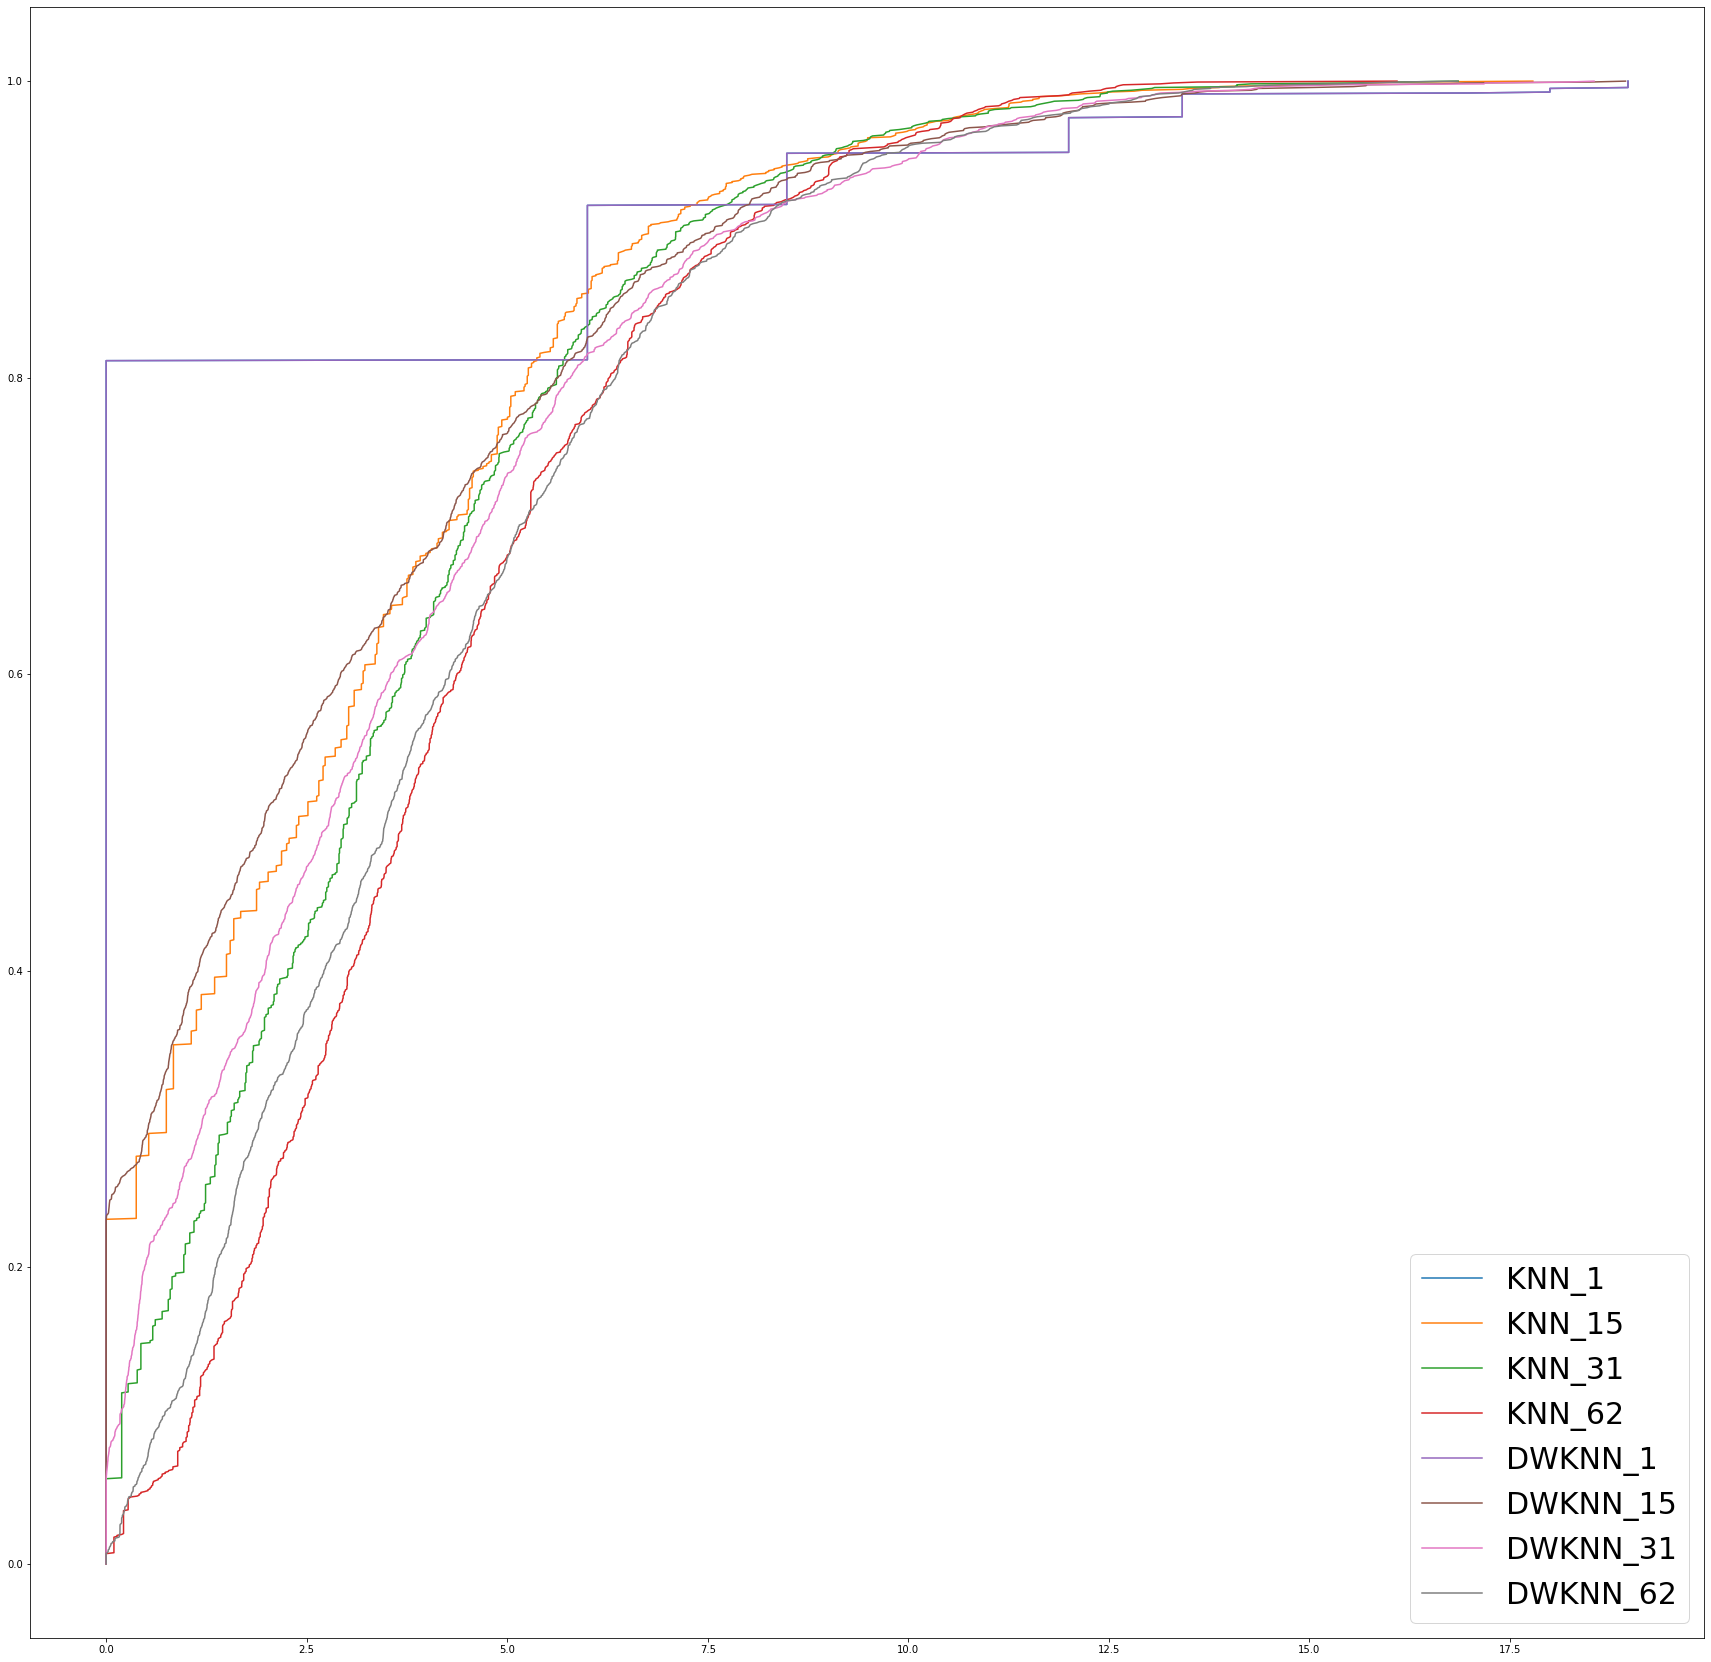

In [44]:
fig= plt.figure(figsize=(30,30))
errorCDFPlot = ('E'+str(exp)+'_errorCDFPlot_T'+str(trial)+'.png')


KNN_kcomp1 = pd.read_csv(KNN_kcomp1File)
errorDf = pd.DataFrame(index = range(len(KNN_kcomp1.values))) #init errorDf

error = KNN_kcomp1['error']
errorDf["knn_k"+str(kvalList[0])+"_error"] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, label = "KNN_1")

KNN_kcomp2 = pd.read_csv(KNN_kcomp2File)
error = KNN_kcomp2['error']
errorDf["knn_k"+str(kvalList[1])+"_error"] = error
knn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp2_error),step=1)/(len(knn_kcomp2_error)-1)
## plotting    
plt.plot(knn_kcomp2_error,cdf, label = "KNN_15")

KNN_kcomp3 = pd.read_csv(KNN_kcomp3File)
error = KNN_kcomp3['error']
errorDf["knn_k"+str(kvalList[2])+"_error"] = error
knn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp3_error),step=1)/(len(knn_kcomp3_error)-1)
## plotting    
plt.plot(knn_kcomp3_error,cdf, label = "KNN_31")

KNN_kcomp4 = pd.read_csv(KNN_kcomp4File)
error = KNN_kcomp4['error']
errorDf["knn_k"+str(kvalList[3])+"_error"] = error
knn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp4_error),step=1)/(len(knn_kcomp4_error)-1)
## plotting    
plt.plot(knn_kcomp4_error,cdf, label = "KNN_62")

#-------------

DWKNN_kcomp1 = pd.read_csv(DWKNN_kcomp1File)
error = DWKNN_kcomp1['error']
errorDf["dwknn_k"+str(kvalList[0])+"_error"] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, label = "DWKNN_1")

DWKNN_kcomp2 = pd.read_csv(DWKNN_kcomp2File)
error = DWKNN_kcomp2['error']
errorDf["dwknn_k"+str(kvalList[1])+"_error"] = error
dwknn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp2_error),step=1)/(len(dwknn_kcomp2_error)-1)
## plotting    
plt.plot(dwknn_kcomp2_error,cdf, label = "DWKNN_15")

DWKNN_kcomp3 = pd.read_csv(DWKNN_kcomp3File)
error = DWKNN_kcomp3['error']
errorDf["dwknn_k"+str(kvalList[2])+"_error"] = error
dwknn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp3_error),step=1)/(len(dwknn_kcomp3_error)-1)
## plotting    
plt.plot(dwknn_kcomp3_error,cdf, label = "DWKNN_31")

DWKNN_kcomp4 = pd.read_csv(DWKNN_kcomp4File)
error = DWKNN_kcomp4['error']
errorDf["dwknn_k"+str(kvalList[3])+"_error"] = error
dwknn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp4_error),step=1)/(len(dwknn_kcomp4_error)-1)
## plotting    
plt.plot(dwknn_kcomp4_error,cdf, label = "DWKNN_62")


# additional plot params
plt.legend(loc='best', fontsize = 30)
plt.savefig(errorCDFPlot)


Median Error:
knn_k1_error       0.000000
knn_k16_error      2.401172
knn_k31_error      3.004679
knn_k62_error      3.696470
dwknn_k1_error     0.000000
dwknn_k16_error    1.967125
dwknn_k31_error    2.774967
dwknn_k62_error    3.484740
dtype: float64

0.75 Quantile Error:
knn_k1_error       0.000000
knn_k16_error      4.875000
knn_k31_error      4.976046
knn_k62_error      5.663564
dwknn_k1_error     0.000000
dwknn_k16_error    4.794953
dwknn_k31_error    5.160256
dwknn_k62_error    5.749750
Name: 0.75, dtype: float64

Max Error:
knn_k1_error       18.973666
knn_k16_error      17.787812
knn_k31_error      16.857609
knn_k62_error      16.094220
dwknn_k1_error     18.973666
dwknn_k16_error    18.942777
dwknn_k31_error    18.550949
dwknn_k62_error    16.852386
dtype: float64

Std Error:
knn_k1_error       3.615161
knn_k16_error      2.971654
knn_k31_error      2.827716
knn_k62_error      2.685323
dwknn_k1_error     3.615161
dwknn_k16_error    3.257827
dwknn_k31_error    3.175944
dwknn_k

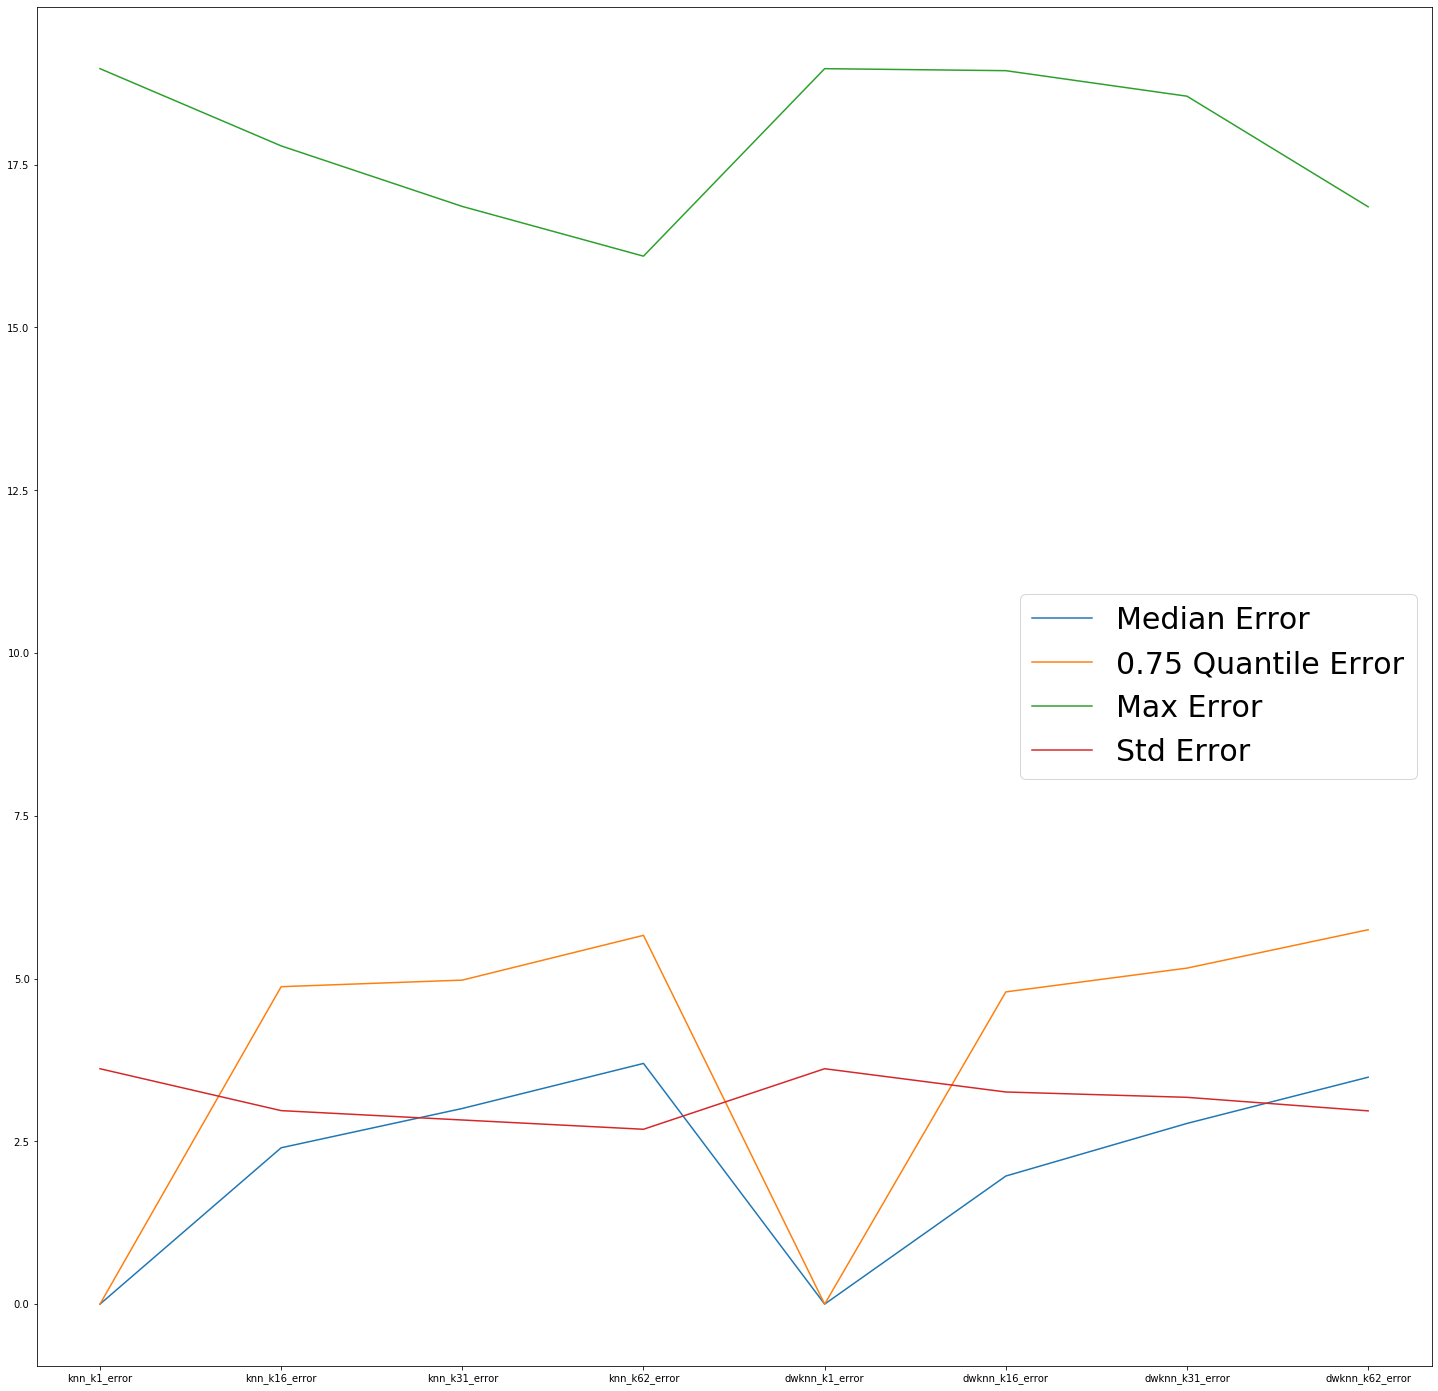

In [45]:
errorLine = ('E'+str(exp)+'_errorLine_T'+str(trial)+'.png')
plt.figure(figsize = (25,25))
print("Median Error:")
print(errorDf.median())
plt.plot(errorDf.median(), label = "Median Error")

print("\n0.75 Quantile Error:")
print(errorDf.quantile(0.75))
plt.plot(errorDf.quantile(0.75), label = "0.75 Quantile Error")
print("\nMax Error:")
print(errorDf.max())
plt.plot(errorDf.max(), label = "Max Error")

print("\nStd Error:")
print(errorDf.std())
plt.plot(errorDf.std(), label = "Std Error")

plt.legend(loc = 'best', fontsize = 30)
plt.savefig(errorLine)

In [46]:
# Create Error File
writeErrSumm = True
fileNameErrSumm = ('E'+str(exp)+'_ErrSummary_T'+str(trial)+'.csv')
meanErrArr = []
medianErrArr = []
quantErrArr = []
maxErrArr = []
stdDevArr = []
for series in errorDf:
    meanErrArr.append(errorDf[series].mean())
    medianErrArr.append(errorDf[series].median())
    quantErrArr.append(errorDf[series].quantile(0.75))
    maxErrArr.append(errorDf[series].max())
    stdDevArr.append(errorDf[series].std())
    
errorSummary = pd.DataFrame(index=range(0,len(errorDf.columns)))
errorSummary.insert(loc=0, column="Mean Error", value=meanErrArr)
errorSummary.insert(loc=1, column="Median Error", value=medianErrArr)
errorSummary.insert(loc=2, column="0.75 Quantile Error", value=quantErrArr)
errorSummary.insert(loc=3, column="Max Error", value=maxErrArr)
errorSummary.insert(loc=4, column="Std Error", value=stdDevArr)
algoType = ["knn_k"+str(kvalList[0]), "knn_k"+str(kvalList[1]), "knn_k"+str(kvalList[2]), "knn_k"+str(kvalList[3]),
                "dwknn_k"+str(kvalList[0]), "dwknn_k"+str(kvalList[1]), "dwknn_k"+str(kvalList[2]), "dwknn_k"+str(kvalList[3])]

errorSummary.insert(loc=0, column="Algorithm", value = algoType)
print(errorSummary)


if (writeErrSumm == True):
    errorSummary.to_csv(fileNameErrSumm, index=False)
    print("File "+fileNameErrSumm+" has been written.")
# print(medianErrArr)

   Algorithm  Mean Error  Median Error  0.75 Quantile Error  Max Error  \
0     knn_k1    1.588207      0.000000             0.000000  18.973666   
1    knn_k16    2.980186      2.401172             4.875000  17.787812   
2    knn_k31    3.466469      3.004679             4.976046  16.857609   
3    knn_k62    4.125274      3.696470             5.663564  16.094220   
4   dwknn_k1    1.588207      0.000000             0.000000  18.973666   
5  dwknn_k16    3.003844      1.967125             4.794953  18.942777   
6  dwknn_k31    3.486566      2.774967             5.160256  18.550949   
7  dwknn_k62    4.020858      3.484740             5.749750  16.852386   

   Std Error  
0   3.615161  
1   2.971654  
2   2.827716  
3   2.685323  
4   3.615161  
5   3.257827  
6   3.175944  
7   2.967849  
File E4_ErrSummary_T5.csv has been written.


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

temp = errorSummary['Algorithm']
errorSummary = errorSummary.reset_index()
errorSummary = errorSummary.drop(columns=['Algorithm'])
errorSummary.index = temp
errorSummary = errorSummary.drop(columns=['index'])
errorSummary


,Mean Error,Median Error,0.75 Quantile Error,Max Error,Std Error
Algorithm,,,,,
knn_k1,1.588207,0.000000,0.000000,18.973666,3.615161
knn_k16,2.980186,2.401172,4.875000,17.787812,2.971654
knn_k31,3.466469,3.004679,4.976046,16.857609,2.827716
knn_k62,4.125274,3.696470,5.663564,16.094220,2.685323
dwknn_k1,1.588207,0.000000,0.000000,18.973666,3.615161
dwknn_k16,3.003844,1.967125,4.794953,18.942777,3.257827
dwknn_k31,3.486566,2.774967,5.160256,18.550949,3.175944
dwknn_k62,4.020858,3.484740,5.749750,16.852386,2.967849


<Figure size 432x288 with 0 Axes>

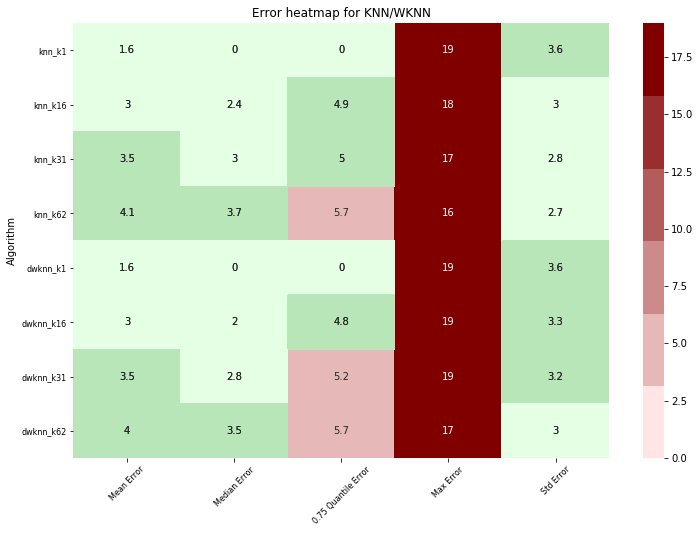

In [48]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
figName = ('E'+str(exp)+'_errorHeatMap_T'+str(trial)+'.png')
fig = plt.figure(facecolor='w', edgecolor='k')
fig =plt.figure(figsize=(12,8))
ax = plt.axes()
g = sns.heatmap(errorSummary, annot=True, cmap =sns.light_palette('maroon'))
sns.heatmap(errorSummary, mask= errorSummary > 5, annot=True, cmap=sns.light_palette('green'), cbar=False,
                ax = ax)
ax.set_title('Error heatmap for KNN/WKNN')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 8)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(figName)